In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Read the training data from a CSV file into a pandas DataFrame
train = pd.read_csv('/content/train.csv')

# Read the test data from a CSV file into a pandas DataFrame
test = pd.read_csv('/content/test.csv')

In [ ]:
# Display the first few rows of the training dataset
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
# Display the first few rows of the test dataset
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
# Count the occurrences of each unique value in the 'subject' column of the training dataset
train['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

In [ ]:
# Print the number of duplicate rows in the training dataset
print('Number of duplicates in train :', train.duplicated().sum())

# Print the number of duplicate rows in the test dataset
print('Number of duplicates in test :', test.duplicated().sum())

# Print the number of missing values in the training dataset
print('Number of missing values in train :', train.isna().values.sum())

# Print the number of missing values in the test dataset
print('Number of missing values in test :', test.isna().values.sum())

Number of duplicates in train : 0
Number of duplicates in test : 0
Number of missing values in train : 0
Number of missing values in test : 0


<Axes: title={'center': 'Barplot of Activity'}, xlabel='count', ylabel='Activity'>

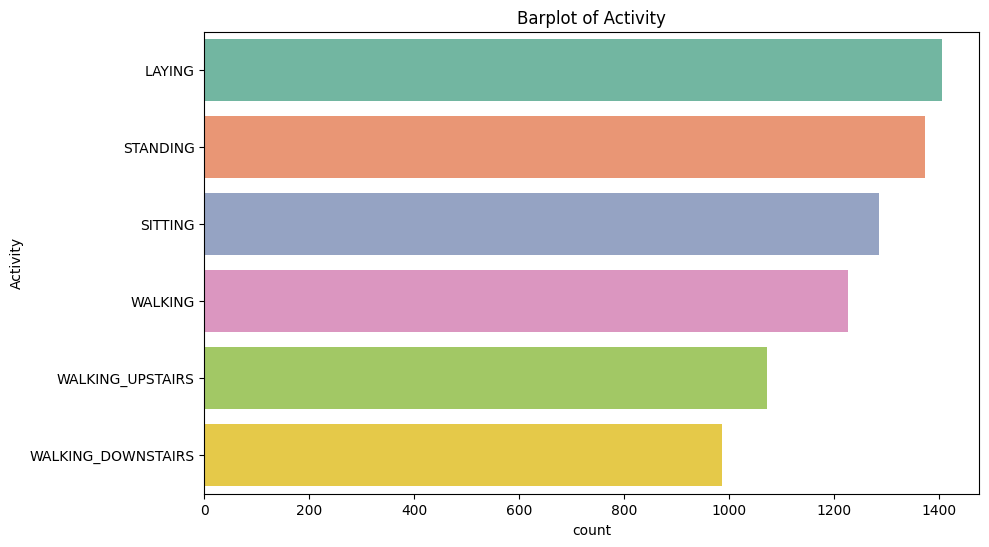

In [ ]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Set the title of the plot
plt.title('Barplot of Activity')

# Create a countplot of the 'Activity' column from the training dataset
sns.countplot(train['Activity'], order=train['Activity'].value_counts().index, palette='Set2')

In [ ]:
# Extract the part of the column names before the first '-' and before the first '(', and
# count the occurrences of each unique part.
# Convert the Counter dictionary to a pandas DataFrame, setting the orientation to 'index'
# and renaming the column to 'count'.
# Sort the DataFrame by the 'count' column in descending order

pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                       orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Text(0.1, 9, 'Dynamic Activities')

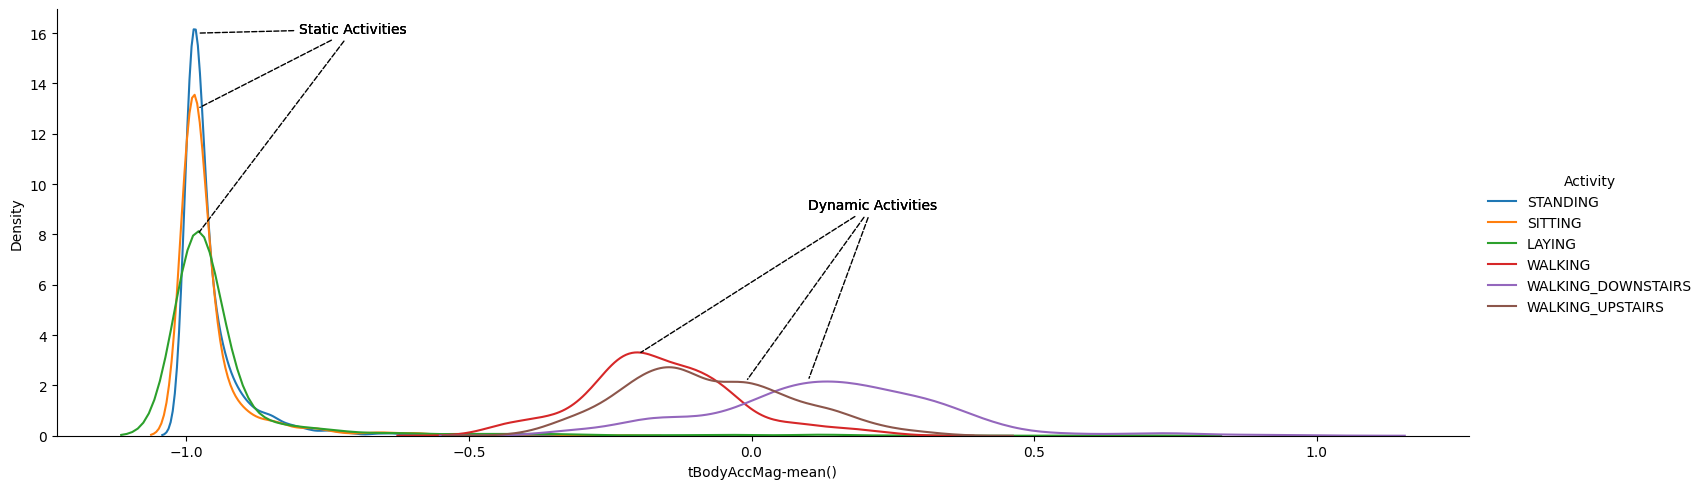

In [ ]:
#Analyzing tBodyAccMag-mean feature
# Create a FacetGrid with the training dataset, specifying 'Activity' as the hue,
# and setting height, and aspect parameters
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)

# Map a kernel density estimate (KDE) plot onto the FacetGrid for the column 'tBodyAccMag-mean()',
# setting hist=False to plot a smooth curve, and add legend
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()

# Annotate regions indicating static activities
plt.annotate('Static Activities', xy=(-.98,8), xytext=(-.8,16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activities', xy=(-.98,13), xytext=(-.8,16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static Activities', xy=(-.98,16), xytext=(-.8,16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})

# Annotate regions indicating dynamic activities
plt.annotate('Dynamic Activities', xy=(-0.2,3.25), xytext=(0.1,9), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activities', xy=(0.1,2.18), xytext=(0.1,9), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic Activities', xy=(-0.01,2.15), xytext=(0.1,9), arrowprops={'arrowstyle':'-', 'ls':'dashed'})

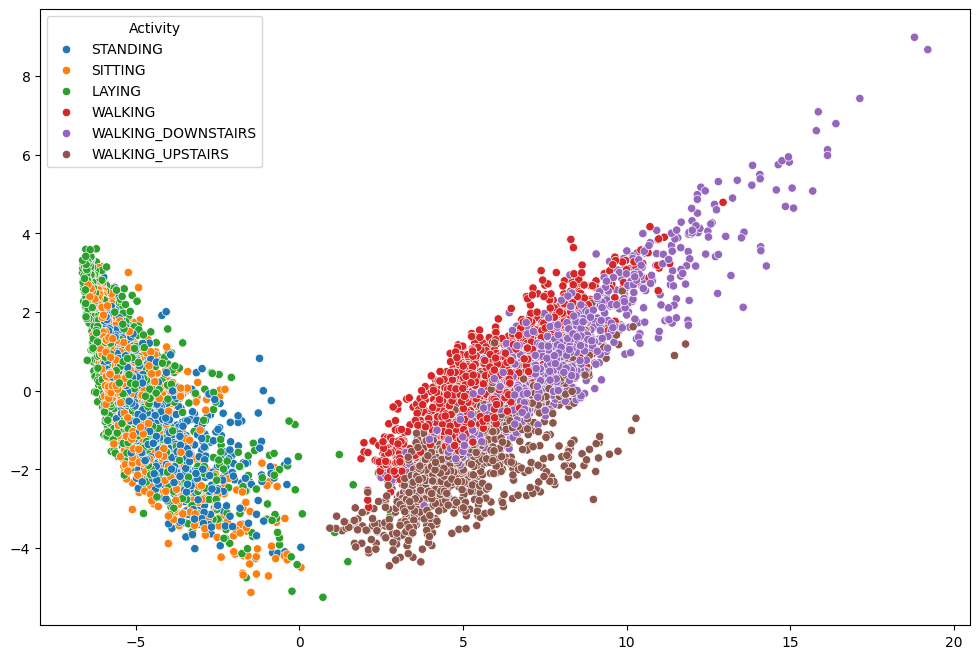

In [ ]:
#Visualizing data using PCA
# Prepare the data for PCA by dropping 'subject' and 'Activity' columns from the training dataset
x_for_pca = train.drop(['subject', 'Activity'], axis=1)

# Perform PCA with 2 components on the prepared data
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

pca

# Set up the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot of the PCA-transformed data, with the first component on the x-axis and
# the second component on the y-axis
# Color the points based on the 'Activity' column from the training dataset
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=train['Activity'])

# Display the plot
plt.show()

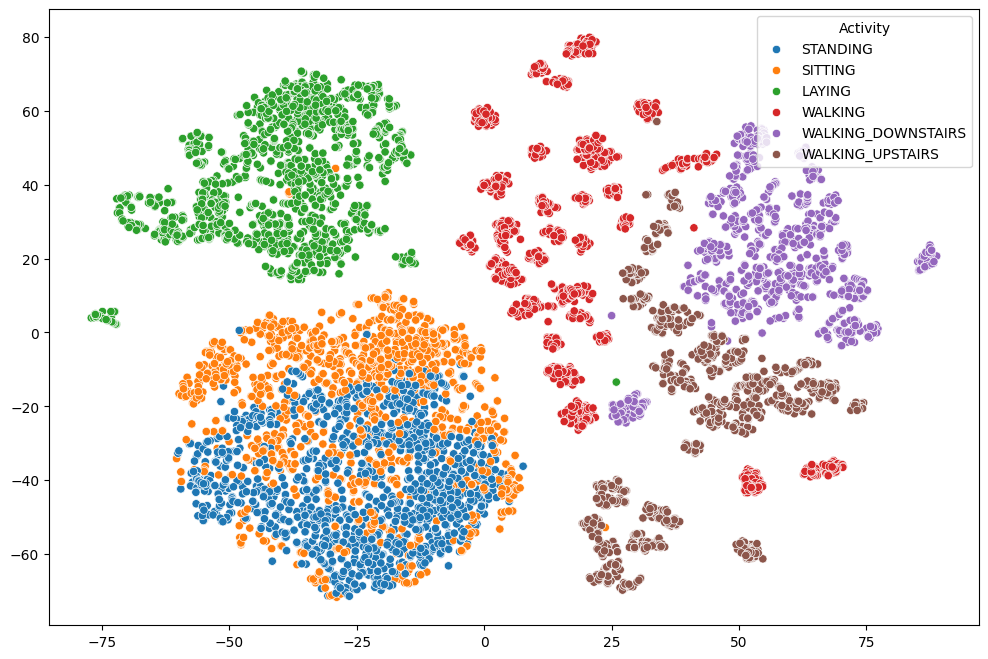

In [ ]:
#Visualizing Data using TSNE

# Prepare the data for t-SNE by dropping 'subject' and 'Activity' columns from the training dataset
x_for_tsne = train.drop(['subject', 'Activity'], axis=1)

# Perform t-SNE with 2 components on the prepared data
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

tsne

# Set up the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot of the t-SNE-transformed data, with the first component on the x-axis and
# the second component on the y-axis
# Color the points based on the 'Activity' column from the training dataset
sns.scatterplot(x=tsne[:,0], y=tsne[:,1], hue=train['Activity'])

# Display the plot
plt.show()

In [ ]:
#ML models
# Separate the features from the target labels in the training dataset
X_train = train.drop(['subject', 'Activity'], axis=1)  # Features (independent variables) for training
y_train = train['Activity']  # Target labels (dependent variable) for training

# Separate the features from the target labels in the testing dataset
X_test = test.drop(['subject', 'Activity'], axis=1)  # Features (independent variables) for testing
y_test = test['Activity']  # Target labels (dependent variable) for testing

# Print the size (shape) of the training dataset
print('Training Data Size :', X_train.shape)

# Print the size (shape) of the testing dataset
print('Testing Data Size :', X_test.shape)

Training Data Size : (7352, 561)
Testing Data Size : (2947, 561)


Accuracy Score Using Logistic Regression  : 0.96


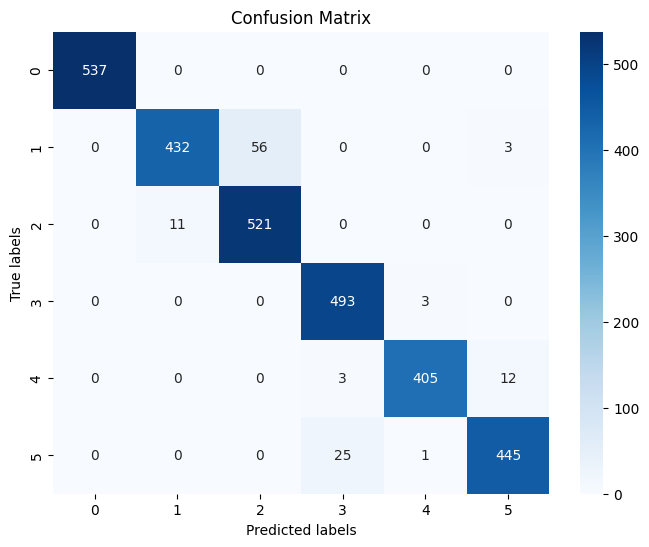

Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}


In [ ]:
# Logistic Regression model with hyperparameter tuning and cross validation
# Define the parameters grid for tuning the logistic regression model
parameters = {'max_iter': [100, 200, 500]}

# Create a logistic regression classifier
lr_classifier = LogisticRegression()

# Create a RandomizedSearchCV object to find the best parameters for the logistic regression model
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5, random_state=42)

# Fit the RandomizedSearchCV object on the training data to find the best parameters
lr_classifier_rs.fit(X_train, y_train)

# Make predictions on the testing data using the tuned logistic regression model
y_pred_lr = lr_classifier_rs.predict(X_test)

# Compute the accuracy score by comparing the predicted labels (y_pred_lr) with the actual labels (y_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Print the accuracy score obtained using logistic regression
print('Accuracy Score Using Logistic Regression  :', round(lr_accuracy, 2))

cm = confusion_matrix(y_test.values, y_pred_lr)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)

# getting best random search attributes for logistic regression
get_best_randomsearch_results(lr_classifier_rs)


Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}
Accuracy Score Using SVM:  0.97


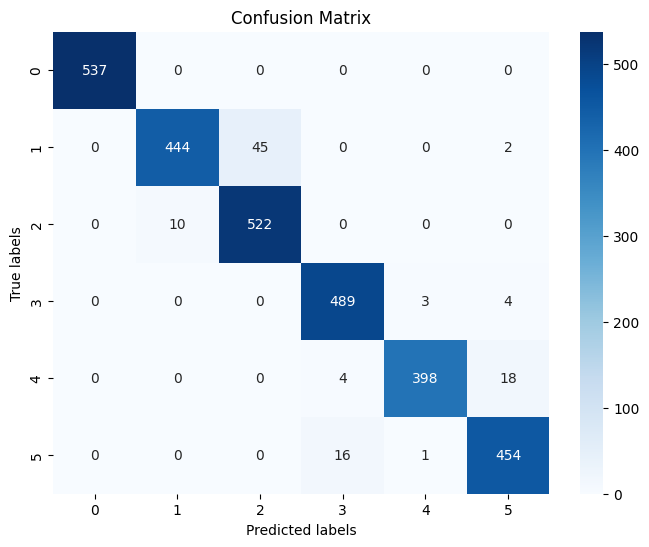

In [ ]:
# Kernel SVM with Hyperparameter Tuning and Cross Validation

# Define the set of hyperparameters for tuning the SVM classifier
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

# Create a RandomizedSearchCV object to find the best hyperparameters for the SVM classifier
svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv=3, random_state=42)

# Perform randomized search to find the best hyperparameters
svm_rs.fit(X_train, y_train)

# Print out the best estimator and the best set of parameters found by RandomizedSearchCV
get_best_randomsearch_results(svm_rs)

# Make predictions on the testing data using the tuned SVM model
y_pred_svm = svm_rs.predict(X_test)

# Compute the accuracy score by comparing the predicted labels (y_pred_svm) with the actual labels (y_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print the accuracy score obtained using the SVM model
print('Accuracy Score Using SVM: ', round(svm_accuracy, 2))

# Compute the confusion matrix
cm_SVM = confusion_matrix(y_test.values, y_pred_svm)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVM, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Best estimator :  DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=6)
Best set of parameters :  {'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 8}
Accuracy Score Using Decision Tree : 0.88


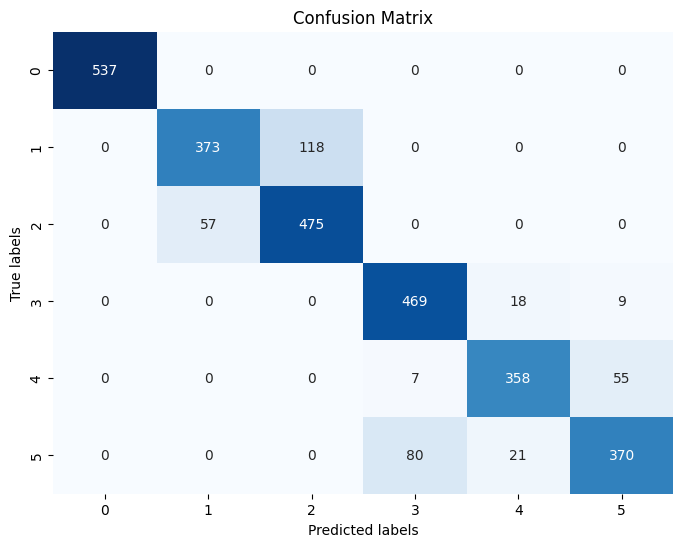

Best estimator :  DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=6)
Best set of parameters :  {'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 8}


In [ ]:
# Decision Tree Model Hyperparameter Tuning and Cross Validation

# Define the set of hyperparameters for tuning the Decision Tree classifier
parameters = {
    'max_depth': np.arange(2, 10, 2),
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5, 7, 9]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Create a RandomizedSearchCV object to find the best hyperparameters for the Decision Tree classifier
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions=parameters, random_state=42)

# Perform randomized search to find the best hyperparameters
dt_classifier_rs.fit(X_train, y_train)

# Print out the best estimator and the best set of parameters found by RandomizedSearchCV
get_best_randomsearch_results(dt_classifier_rs)

# Make predictions on the testing data using the tuned Decision Tree model
y_pred_dt = dt_classifier_rs.predict(X_test)

# Compute the accuracy score by comparing the predicted labels (y_pred_dt) with the actual labels (y_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Print the accuracy score obtained using the Decision Tree model
print('Accuracy Score Using Decision Tree :', round(dt_accuracy, 2))

# Compute the confusion matrix
cm_DT = confusion_matrix(y_test.values, y_pred_dt)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Call the get_best_randomsearch_results function to print out the best estimator and best parameters for the Decision Tree model
get_best_randomsearch_results(dt_classifier_rs)


In [ ]:
print('--------------------------------------')
print('Accuracy Scores for all the models :')
print('--------------------------------------')
print('Logistic Regression :', round(lr_accuracy,2))
print('Support Vector Classifier :', round(svm_accuracy,2))
print('Decision Tree Classifier :', round(dt_accuracy,2))
print('--------------------------------------')

--------------------------------------
Accuracy Scores for all the models :
--------------------------------------
Logistic Regression : 0.96
Support Vector Classifier : 0.97
Decision Tree Classifier : 0.88
--------------------------------------
